<a href="https://colab.research.google.com/github/DeeS17/business_analysis/blob/main/sprint_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Konten
* Tahap 1: Pra-Pemrosesn Data
* Tahap 2: Memuat Data
  * Kesimpulan Memuat Data
* Tahap 3: Analisa
  * Analisa Metrik Aktivitas Pengguna Terhadap Produk
    * Jumlah Pengguna Aktif Harian, Mingguan, dan Bulanan
    * Jumlah Sesi per Hari
    * Durasi Dalam setiap Sesi
    * Seberapa Sering Pengguna Kembali Menggunakan Aplikasi
    * Kesimpulan Aktivitas Pengguna
  * Analisa Penjualan
    * Konversi
    * Jumlah Pesanan per Bulan Berdasarkan Cohort
    * Rata-Rata Pendapatan per Bulan Berdasarkan Cohort
    * Analisa Lifetime Value (LTV) Pengguna Situs Y.Afisha
    * Kesimpulan Analisa Penjualan
  * Analisa Pemasaran
    * Analisa Biaya Pemasaran per Bulan Berdasarkan Sumber
    * Analisa Biaya Akuisisi Pelanggan Berdasarkan Sumber
    * Analisa ROI dari Biaya Pemasaran
    * Kesimpulan Analisa Pemasaran

# Pendahuluan

Y.Afisha, sebuah aplikasi yang tidak hanya memfasilitasi para penggunanya untuk mendapatkan informasi seputar event penting seperti pertunjukan film, pameran, konser, dll. Aplikasi ini juga memfasilitasi pembelian tiketnya. Untuk dapat mengetahui bagaimanakah perilaku penggunanya saya akan mengeksplorasi melaui data kunjungan dan pembelian. Selain itu kunjungan pengguna juga didapatkan karena Y.Afisha mengiklankan aplikasinya. Iklan tersebut memakan biaya yang biayanya sebaiknya tidak lebih dari pendapatan yang didapatkan.

# Tujuan

Tujuan dari proyek ini adalah mengetahui berapa banyak dan kemana saja uang pemasaran harus diinvestasikan.

# Tahapan

* Pra-Pemrosesan Data
* Memuat Data
* Analisa

## Pra-Pemrosesan Data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Memuat Data

In [ ]:
try:
  visits = pd.read_csv('/datasets/visits_log_us.csv', dtype={'Device': 'category'}, parse_dates=['Start Ts', 'End Ts'])
except:
  visits = pd.read_csv('/content/visits_log_us.csv', dtype={'Device': 'category'}, parse_dates=['Start Ts', 'End Ts'])

visits.columns = ['device', 'end_ts', 'source_id', 'start_ts', 'uid']
visits.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   device     359400 non-null  category      
 1   end_ts     359400 non-null  datetime64[ns]
 2   source_id  359400 non-null  int64         
 3   start_ts   359400 non-null  datetime64[ns]
 4   uid        359400 non-null  uint64        
dtypes: category(1), datetime64[ns](2), int64(1), uint64(1)
memory usage: 11.3 MB


`Dataframe visits` terdiri dari kolom `device`, `end_ts`, `source_id`, `start_ts`, dan `uid`. `Dataframe` memiliki `359,400` baris. Tidak ada data yang hilang dan tipe datanya telah disesuakan ketika memuat data.  

In [ ]:
try:
  orders = pd.read_csv('/datasets/orders_log_us.csv', parse_dates=['Buy Ts'])
except:
  orders = pd.read_csv('/content/orders_log_us.csv', parse_dates=['Buy Ts'])

orders.columns = ['buy_ts', 'revenue', 'uid']
orders.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   buy_ts   50415 non-null  datetime64[ns]
 1   revenue  50415 non-null  float64       
 2   uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


`Dataframe orders` terdiri dari kolom `buy_ts`, `revenue`, dan `uid`. `Dataframe` terdiri `50,415` baris. Tidak data yang hilang dan tipe datanya telah disesuaikan ketika memuat data.

In [ ]:
try:
  costs = pd.read_csv('/datasets/costs_us.csv', parse_dates=['dt'])
except:
  costs = pd.read_csv('/content/costs_us.csv', parse_dates=['dt'])

costs.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


`Dataframe costs` terdiri dari kolom `source_id`, `dt`, dan `costs`. `Dataframe` terdiri dari `2,542` baris. Tidak ada data yang hilang dan tipe datanya telah disesuaikan ketika memuat data.

### Kesimpulan Memuat Data

Data terdiri dari 3 buah tabel `dataframe` yang masing-masing bernama `visits`, `orders` dan `costs`. Dari Ketiga tabel masing-masing menjelaskan hal yang berikut:
- `visits` menjelaskan jumlah kunjungan pengguna ke situs `Y.Afisha`. Dalam tabel tersebut juga dijelaskan waktu pengunjung datang, waktu pengunjung keluar, perangkat yang digunakan, sumber iklan yang membawa pengunjung datang ke situs web, dan user id dari pengguna.
- `orders` menjelaskan tentang pembelian yang dilakukan oleh customer. Dalam tabel tersebut memuat informasi waktu transaksi dibuat, nilai transaksi, dan user id pengguna.
- `costs` menjelaskan tentang biaya iklan. Dlaman tabel tersebut memuat informasi tanggal biaya iklan dibukukan, sumber iklan, dan biaya iklan yang dikeluarkan.

Selain beberapa informasi yang saya dapat dari ketiga `dataframe` tersebut:
- Dari ketiga `dataframe` tersebut tidak ada nilai yang hilang.
- Dilakukan penyesuaian tipe data `object` mejadi `datetime` pada beberapa kolom di ketiga tabel tersebut. 
- Penyesuaian data juga dilakukan pada tipe data `object` menjadi `category` pada kolom `device` di tabel `visits`.
- Penyesuaian data juga membantu mengoptimalkan data menjadi lebih efisien. 

## Analisa Data

### Analisa Metrik Aktivitas Pengguna Terhadap Produk

#### Jumlah Pengguna Aktif Harian, Mingguan, dan Bulanan 

In [ ]:
visits['year_ts'] = visits['start_ts'].dt.year
visits['month_ts'] = visits['start_ts'].dt.month
visits['week_ts'] = visits['start_ts'].dt.isocalendar().week
visits['date_ts'] = visits['start_ts'].dt.date
visits.head()

,device,end_ts,source_id,start_ts,uid,year_ts,month_ts,week_ts,date_ts
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,51,2017-12-20
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,8,2018-02-19
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,7,26,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,20,2018-05-20
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,12,52,2017-12-27


Kolom `year_ts`, `month_ts`, `week_ts`, dan `date_ts` telah ditambahkan. Hal ini diperlukan agar dapat menghitung metrik aktivitas pengguna dalam kurun waktu harian, mingguan, dan bulanan (`DAU`, `WAU`, & `MAU`). 

In [ ]:
dau_total = visits.groupby('date_ts').agg({'uid':'nunique'}).mean().astype('int')
dau_total

uid    907
dtype: int64

Dari nilai `dau_total` menunjukan bahwa rata-rata ada `907 pengguna` yang aktif mengakses `Y.Afisha`. 

In [ ]:
wau_total = visits.groupby(['year_ts', 'week_ts']).agg({'uid':'nunique'}).mean().astype('int')
wau_total

uid    5716
dtype: int64

Dalam seminggu ternyata rata-rata ada `5,716` pengguna yang aktif mengakses `Y.Afisha` dalam rentang satu minggu, selanjutnya saya akan melihat berapa pengguna yang mengakses dalam sebulan.  

In [ ]:
mau_total = visits.groupby(['year_ts', 'month_ts']).agg({'uid':'nunique'}).mean().astype('int')
mau_total

uid    23228
dtype: int64

Dan dari nilai `mau_total` ada `23,228` pengguna yang aktif mengakses `Y.Afisha` dalam rentang satu bulan.

#### Jumlah Sesi per Hari

In [ ]:
sess_per_day = visits.groupby('date_ts').agg({'uid':'count'}).mean().astype('int')
sess_per_day

uid    987
dtype: int64

Dalam sehari rata-rata ada `987` sesi per hari dan rata-rata ada `907` pengguna mengakses `Y.Afisha` dalam sehari. Artinya ada pengguna mengakses `Y.Afisha` lebih dari satu sesi per hari. 

#### Durasi Dalam Setiap Sesi

Untuk dapat menghitung durasi, saya perlu membuat kolom durasi sebelumnya. Pada cell dibawah, saya membuat kolom durasi per sesi dalam satuan detik.

In [ ]:
visits['dura_sec'] = (visits['end_ts'] - visits['start_ts']).dt.seconds
visits.head()

,device,end_ts,source_id,start_ts,uid,year_ts,month_ts,week_ts,date_ts,dura_sec
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,51,2017-12-20,1080
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,8,2018-02-19,1680
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,7,26,2017-07-01,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,20,2018-05-20,1440
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,12,52,2017-12-27,0


kolom `durasi` telah ditambahkan kedalam `dataframe`. Selanjutnya saya akan melihat histogramnya. Saya akan melihat terlebih dahulu apakah ada penumpukan data pada suatu titik. Jika ada saya akan menggunakan `modus` jika tidak maka saya akan menggunakan nilai `mean`. 

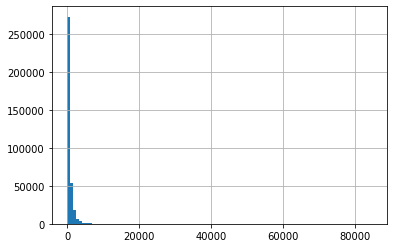

In [ ]:
visits['dura_sec'].hist(bins=100)

Ada penumpukan data disekitar nilai `0`, karena itu nilai `modus` lebih relevan dibandingkan nilai `mean`.

In [ ]:
asl = visits['dura_sec'].mode() 
asl[0]

60

Rata-rata durasi pengguna ketika mengakses `Y.Afisha` adalah `60 detik`. Sepertinya waktu tersebut terlalu singkat bagi seorang pengguna mengakes aplikasi. Hal ini akan menjadi catatan dalam analisa selanjutnya. 

#### Seberapa Sering Pengguna Kembali Menggunakan Aplikasi

Untuk melihat seberapa sering pengguna kembali menggunakan aplikasi saya akan menggunakan metrik `sticky factor`. Ada dua `sticky factor`, `sticky factor` `WAU` dan `MAU`. Saya akan menghitung kedua `sticky factor` tersebut.  

In [ ]:
sticky_wau = dau_total/wau_total * 100
sticky_mau = dau_total/mau_total * 100

print('Nilai sticky factor WAU adalah: '+ str(sticky_wau.uid))
print('Nilai sticky factor WAU adalah: '+ str(sticky_mau.uid))

Nilai sticky factor WAU adalah: 15.867739678096571
Nilai sticky factor WAU adalah: 3.9047701050456345


Dari nilai tersebut artinya ada `16%` dari pengguna aktif mingguan yang kembali aktif menggunakan aplikasi secara harian. Sedangkan hanya kurang dari `4%` dari pengguna aktif bulanan yang kembali aktif menggunakan aplikasi secara harian.

#### Kesimpulan Analisa Aktivitas Pengguna

Dari berbagai analisa yang telah dilakukan kita dapat melihat dalam rata-rata ada `23,228` pengguna mengunjungi situs `Y.Afisha` dalam sebulan, `5,716` dalam seminggu, dan `907` dalam sehari. Artinya ada `15.86%` pengguna mingguan yang mengakses harian, dan hanya `3.9%` dari pengguna bulanan yang mengakses situs secara harian.

Dari segi durasi rata-rata waktu kunjungan pengguna ke situs adalah `60 detik`. Durasi tersebut menurut saya terlalu pendek untuk waktu kunjungan seseorang kedalam sebuah situs. Kemungkinan ada versi situs yang mengalami gangguan sehingga pengguna mengakhiri sesinya lebih cepat. Karena itu hal ini kan menjadi catatan dalam analisa selanjutnya. 

### Analisa Penjualan

#### Konversi

Pada bagian ini, saya akan melihat berapa lamakah waktu yang dibutuhkan hingga terjadinya transaksi. Agar dapat menghitung hal tersebut, saya perlu membuat kolom waktu pertama kali pengguna mengakses aplikasi. Saya juga akan menambahkan kolom `device` agar dapat memperkaya analisa jika dibutuhkan.

In [ ]:
first_access = visits.groupby(['uid'])['start_ts'].min()
first_access.name = 'first_access'
first_access = first_access.reset_index()

orders_ = orders.merge(first_access, on='uid')
orders_.head()

,buy_ts,revenue,uid,first_access
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:09:00
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:14:00
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:25:00
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:14:00
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:31:00


Kolom `first_access`telah berhasil ditambahkan. Sekarang akan melanjutkan proses analisa `konversi` dengan menambahkan kolom `conversion_time`.

In [ ]:
orders_['coversion_time'] = orders_['buy_ts'] - orders_['first_access']
orders_.head()

,buy_ts,revenue,uid,first_access,coversion_time
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:09:00,0 days 00:01:00
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:14:00,0 days 00:11:00
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:25:00,0 days 00:02:00
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:14:00,0 days 00:15:00
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:31:00,0 days 00:27:00


Kolom `conversion time` telah berhasil ditambahkan. Saya akan melihat persebarannya. 

In [ ]:
orders_.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50415 entries, 0 to 50414
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype          
---  ------          --------------  -----          
 0   buy_ts          50415 non-null  datetime64[ns] 
 1   revenue         50415 non-null  float64        
 2   uid             50415 non-null  uint64         
 3   first_access    50415 non-null  datetime64[ns] 
 4   coversion_time  50415 non-null  timedelta64[ns]
dtypes: datetime64[ns](2), float64(1), timedelta64[ns](1), uint64(1)
memory usage: 2.3 MB


In [ ]:
orders_['coversion_time'].describe()

count                         50415
mean     37 days 00:53:06.287414460
std      70 days 14:39:40.373203781
min                 0 days 00:00:00
25%                 0 days 00:06:00
50%                 0 days 03:26:00
75%                38 days 09:22:30
max               364 days 08:29:00
Name: coversion_time, dtype: object

Jarak antara nilai terbesar dan terkecilnya ternyata sangat jauh jaraknya. Waktu konversi terkecilnya dibawah `1 menit` sedangkan terbesarnya hampir `1 tahun`. 

Saya akan menghitung rata-rata waktu konversi dalam hari berdasarkan `cohort`. Karena itu saya akan mengubah waktu konversi dalam hari dan menambahkan kolom `first_access_month` agar dapat melakukan analisa `cohort`.

In [ ]:
orders_['coversion_days'] = orders_['coversion_time'].dt.days
orders_['first_access_month'] = orders_['first_access'].astype('datetime64[M]')
orders_.head()

,buy_ts,revenue,uid,first_access,coversion_time,coversion_days,first_access_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:09:00,0 days 00:01:00,0,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:14:00,0 days 00:11:00,0,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:25:00,0 days 00:02:00,0,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:14:00,0 days 00:15:00,0,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:31:00,0 days 00:27:00,0,2017-06-01


Kolom `coversion_time_days` dan `first_access_month` telah berhasil ditambahkan. Maka saya sudah dapat menghitung rata-rata waktu konversinya berdasarkan `cohort`.

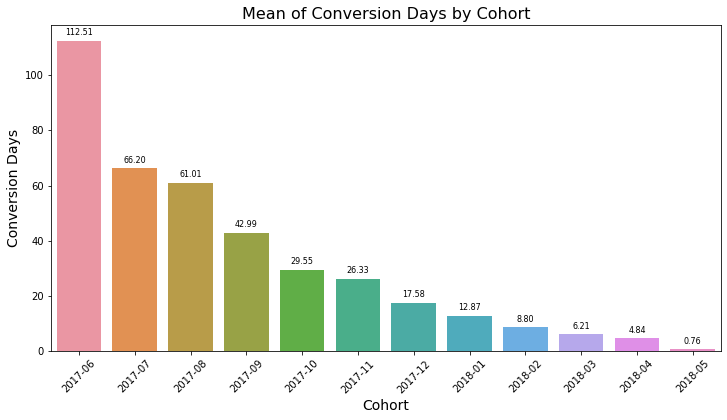

In [ ]:
conversion_days_by_cohort = orders_.groupby('first_access_month')['coversion_days'].mean()
conversion_days_by_cohort.name = 'mean_of_conversion_days'
conversion_days_by_cohort = conversion_days_by_cohort.reset_index()
conversion_days_by_cohort['first_access_month'] = conversion_days_by_cohort['first_access_month'].dt.to_period('M') 

fig, ax = plt.subplots(figsize=(12, 6))
plots = sns.barplot(data=conversion_days_by_cohort, x='first_access_month', y='mean_of_conversion_days', ax=ax)

for bar in plots.patches:
   
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=8, xytext=(0, 8),
                   textcoords='offset points')

plt.xticks(rotation=45)
plt.title('Mean of Conversion Days by Cohort', size=16)
plt.xlabel('Cohort', size=14)
plt.ylabel('Conversion Days', size=14)
plt.show()

Dari grafik diatas memperlihatkan berdasarkan `cohort`, semakin lama waktu `konversi` semakin rendah. Terutama pada `cohort` `2017-06` ke `2017-07` waktu konversinya menurun hampir `50%`. Hal tersebut artinya baik. Karena semakin lama proses pengguna mulai mengakses situs `Y.Afisha` hingga membuat transaksi semakin pendek. 

Namun ada hal yang ganjil, karena `cohort` pengguna yang melakukan pembelian hanya dari `Juni 2017` sampai bulan `Mei 2018`. Padahal `dataframe` berisi aktifitas pengguna mulai dari `Januari 2017` hingga `Desember 2018`.  

#### Jumlah Pesanan per Bulan Berdasarkan Cohort

Untuk dapat menghitung pesanan per bulan, saya akan menambahkan kolom waktu bulan penjualan.

In [ ]:
orders_['buy_ts_month'] = orders_['buy_ts'].dt.to_period('M')
orders_['first_access_month'] = orders_['first_access_month'].dt.to_period('M')
orders_.head()

,buy_ts,revenue,uid,first_access,coversion_time,coversion_days,first_access_month,buy_ts_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:09:00,0 days 00:01:00,0,2017-06,2017-06
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:14:00,0 days 00:11:00,0,2017-06,2017-06
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:25:00,0 days 00:02:00,0,2017-06,2017-06
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:14:00,0 days 00:15:00,0,2017-06,2017-06
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:31:00,0 days 00:27:00,0,2017-06,2017-06


Kolom bulan penjualan telah berhasil ditambahkan dengan nama `buy_ts_month`. Selanjutnya saya akan membuat pivot tabelnya. 

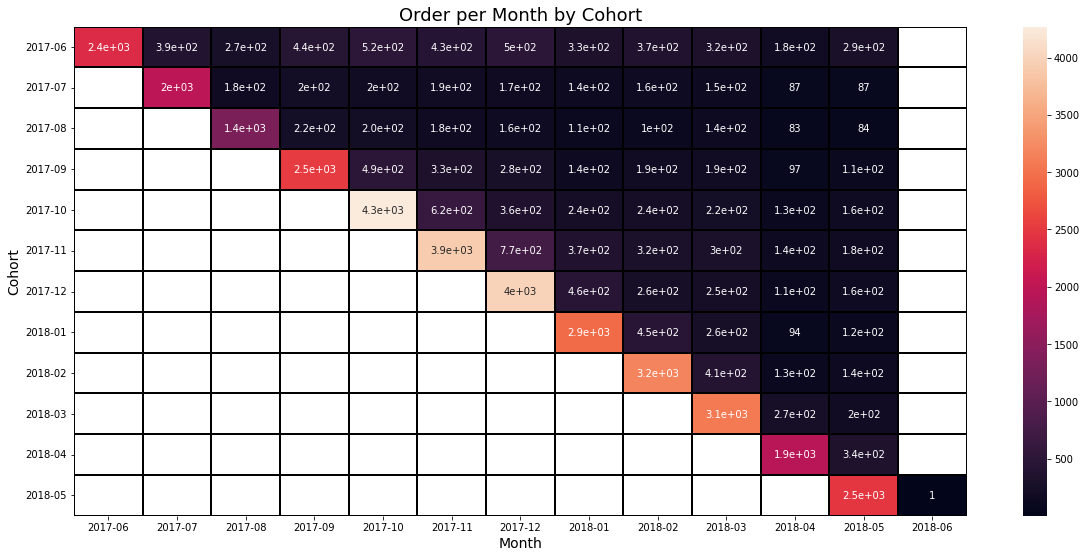

In [ ]:
orders_per_m_by_cohort = orders_.pivot_table(
    index='first_access_month',
    columns = ['buy_ts_month'],
    values = 'revenue',
    aggfunc = 'count'
)

plt.figure(figsize=(20, 9))
plt.title('Order per Month by Cohort', size=18)
sns.heatmap(
    orders_per_m_by_cohort,
    annot=True,
    linewidths=1,
    linecolor='black')

plt.ylabel('Cohort', size=14)
plt.xlabel('Month', size=14)
plt.show()

Fenomena yang menarik terjadi pada setiap `cohort` adalah pada bulan pertama terjadi sangat banyak. Mulai dari 1,900 hingga 4,300. Namun pada bulan kedua turun hingga dibawah 1,000 transaksi. Mulai dari `180` hingga `770` transaksi.

Selain itu pada bulan `Juni 2018` terjadi anomali karena hanya terjadi 1 transaksi dari semua `cohort`. Kemungkinan ada gangguan pada situs sehinggga terjadi pengguna mengalami kesulitan ketika ingin melakukan transaksi.  

#### Rata-Rata Pendapatan per Bulan Berdasarkan Cohort

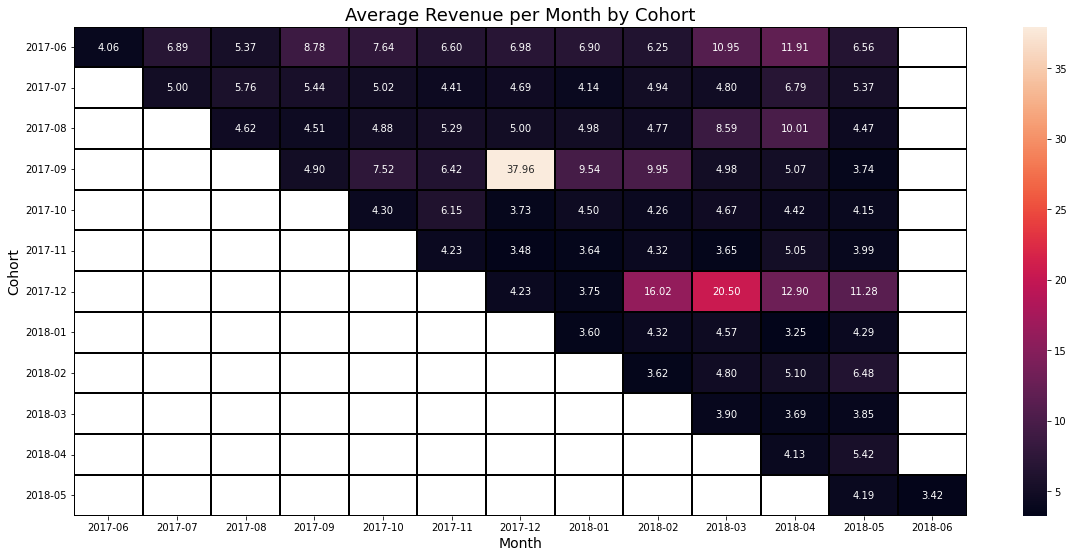

In [ ]:
avg_rev_per_m_by_cohort = orders_.pivot_table(
    index='first_access_month',
    columns='buy_ts_month',
    values='revenue',
    aggfunc='mean'
)

plt.figure(figsize=(20, 9))
plt.title('Average Revenue per Month by Cohort', size=18)
sns.heatmap(
    avg_rev_per_m_by_cohort,
    fmt='.2f',
    annot=True,
    linewidths=1,
    linecolor='black')

plt.ylabel('Cohort', size=14)
plt.xlabel('Month', size=14)
plt.show()

Dari visualisasi `heatmap` diatas memperlihatkan `cohort` bulan `Desember 2017` melakukan pembelian relatif lebih tinggi dibandingkan `cohort` lainnya. Terutama pada bulan `Februari` hingga `Mei` 2018.

Pada bulan `Maret` dan `April` tahun `2018` juga terjadi kenaikan rata-rata pembelian pada beberapa `Cohort`. Kenaikan terjadi pada `cohort` `2017-06`, `2017-08`, dan `2017-12`.

#### Analisa Lifetime Value (LTV) Pengguna Situs Y.Afisha

 Jika pada sebelumnya analisa `cohort` menggunakan waktu pertama kali pengguna mengakses situs `Y.Afisha`. Pada analisa `LTV` analisa cohort bedasarkan waktu pertama kali seorang pengguna membuat transaksi. Untuk itu saya akan membuat kolom `first_buy_month`.  

In [ ]:
orders_ltv = orders.copy()
orders_ltv['buy_month'] = orders_ltv['buy_ts'].astype('datetime64[M]')
first_orders = orders_ltv.groupby('uid').agg({'buy_month':'min'}).reset_index()
first_orders.columns = ['uid', 'first_buy_month']
first_orders.head()

,uid,first_buy_month
0,313578113262317,2018-01-01
1,1575281904278712,2017-06-01
2,2429014661409475,2017-10-01
3,2464366381792757,2018-01-01
4,2551852515556206,2017-11-01


Kolom `first_buy_month` telah berhasil dibuat. Selanjutnya saya perlu membuat kolom `n_buyers` yang informasinya memuat jumlah `user id` per `cohort` pembelian. 

In [ ]:
cohort_sizes = (
    first_orders.groupby('first_buy_month').agg({'uid':'nunique'}).reset_index()
)
cohort_sizes.columns = ['first_buy_month', 'n_buyers']
cohort_sizes.head()

,first_buy_month,n_buyers
0,2017-06-01,2023
1,2017-07-01,1923
2,2017-08-01,1370
3,2017-09-01,2581
4,2017-10-01,4340


Kolom `n_buyers` telah berhasil ditambahkan. sekarang saya kakn menggabungkan `cohort` `first_buy_month` kedalam tabel `orders_ltv`.

In [ ]:
orders_ltv = orders_ltv.merge(first_orders, on='uid')
orders_ltv.head()

,buy_ts,revenue,uid,buy_month,first_buy_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01


Kolom `first buy month` telah berhasil ditambahkan. Untuk dapat menghitung `LTV` saya perlu mengelompokan `revenue` berdasarkan `first_buy_month` dan `buy_month`.

In [ ]:
cohorts = orders_ltv.groupby(['first_buy_month', 'buy_month']).agg({'revenue':'sum'}).reset_index()
cohorts.head()

,first_buy_month,buy_month,revenue
0,2017-06-01,2017-06-01,9557.49
1,2017-06-01,2017-07-01,981.82
2,2017-06-01,2017-08-01,885.34
3,2017-06-01,2017-09-01,1931.30
4,2017-06-01,2017-10-01,2068.58


Data `revenue` telah berhasil dkelompokan per bulan. Selanjutnya saatnya menambahkan kolom `n_users` keadalam dataset.

In [ ]:
report = cohorts.merge(cohort_sizes, on='first_buy_month')
report.head()

,first_buy_month,buy_month,revenue,n_buyers
0,2017-06-01,2017-06-01,9557.49,2023
1,2017-06-01,2017-07-01,981.82,2023
2,2017-06-01,2017-08-01,885.34,2023
3,2017-06-01,2017-09-01,1931.30,2023
4,2017-06-01,2017-10-01,2068.58,2023


Kolom `n_buyers` telah berhasil ditambahkan. Selanjutnya saya akan menambahkan kolom `age` dan `ltv`. Kolom `age` memuat informasi usia suatu cohort pengguna dalam menggunakan produk tertentu. Periode usia yang akan saya gunakan pada analisa ini dalam bulan. Sedangkan kolom `ltv` adalah pendapatan rata-rata dari customer yang dikategorikan dalam suatu `cohort` dan periode `lifetime`.

In [ ]:
report['age'] = (report['buy_month'] - report['first_buy_month']) / np.timedelta64(1, 'M')
report['age'] = report['age'].round().astype('int')
report['ltv'] = report['revenue'] / report['n_buyers']
report.head()

,first_buy_month,buy_month,revenue,n_buyers,age,ltv
0,2017-06-01,2017-06-01,9557.49,2023,0,4.724414
1,2017-06-01,2017-07-01,981.82,2023,1,0.485329
2,2017-06-01,2017-08-01,885.34,2023,2,0.437637
3,2017-06-01,2017-09-01,1931.30,2023,3,0.954671
4,2017-06-01,2017-10-01,2068.58,2023,4,1.022531


Semua kolom yang dibutuhkan telah ada. Saatnya membuat visualisasinya.

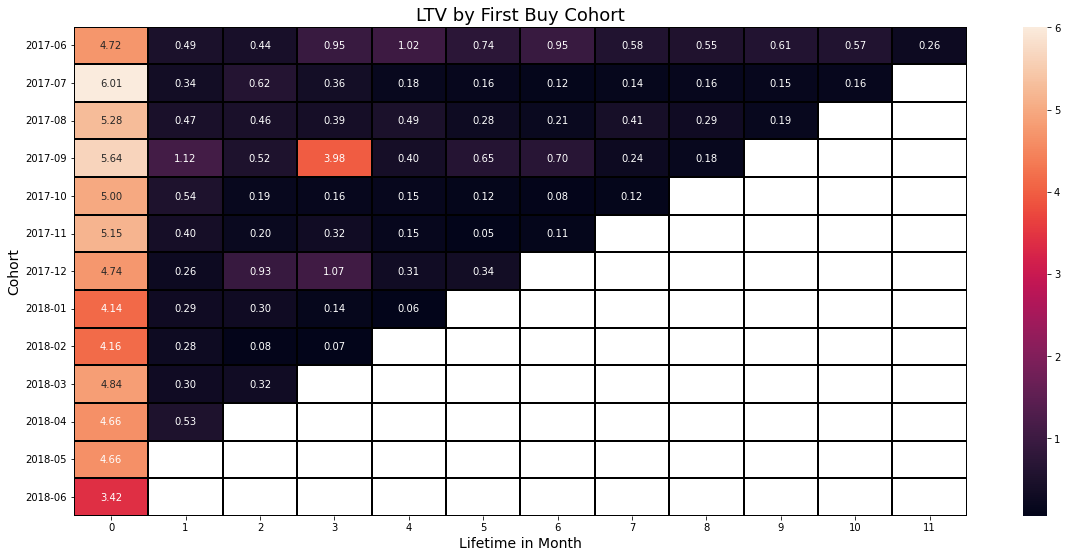

In [ ]:
report['first_buy_month'] = report['first_buy_month'].dt.to_period('M')

result = report.pivot_table(
    index = 'first_buy_month',
    columns='age',
    values='ltv',
    aggfunc='mean'
)

plt.figure(figsize=(20, 9))
plt.title('LTV by First Buy Cohort', size=18)
sns.heatmap(
    result,
    fmt='.2f',
    annot=True,
    linewidths=1,
    linecolor='black')

plt.ylabel('Cohort', size=14)
plt.xlabel('Lifetime in Month', size=14)
plt.show()

Dari visualisasi `heatmap` diatas menunjukan nilai `LTV` pada bulan pertama begitu tinggi, namun jatuh pada bulan kedua. Hal tersebut juga muncul saat analisa jumlah pesanan dan rata-rata pendapatan. Mungkin tim marketing memberikan promo yang sangat besar saat bulan pertama pengguna melakukan transaksi pertama kali.  

#### Kesimpulan Analisa Penjualan

Dari analisa jumlah pesanan, rata-rata pendapatan, dan LTV ada garis merah yang yang dapat ditarik. Dari segi jumlah pesanan dan LTV mengalami penurunan drastis setelah sebuah `cohort` memasuki bulan kedua. Hal ini mungkin karena adanya program promosi ketika bulan pertama pembeli melakukan transaksi. Hal ini baik untuk tim marketing, namun program perlu disesuaikan agar memicu perilaku pembelian yang lebih konsisten. Tidak hanya di bulan pertama.

Hal kedua adalah sepertinya terjadi gangguan pada bulan kedua `Juni 2018` sehingga pembeli kesulitan untuk melakukan transaksi. Hal tersebut menyebabkan hanya ada 1 pesanan yang masuk. Pesanan yang masuk tersebut dari berasal dari `cohort pembelian` dibulan yang sama. Nilai rata-rata pendapatan dan `LTV`nya pun sama-sama `3.42` karena hanya ada 1 orang pengguna yang melakukan transaksi. 

### Analisa Pemasaran

#### Analisa Biaya Pemasaran per Bulan Berdasarkan Sumber

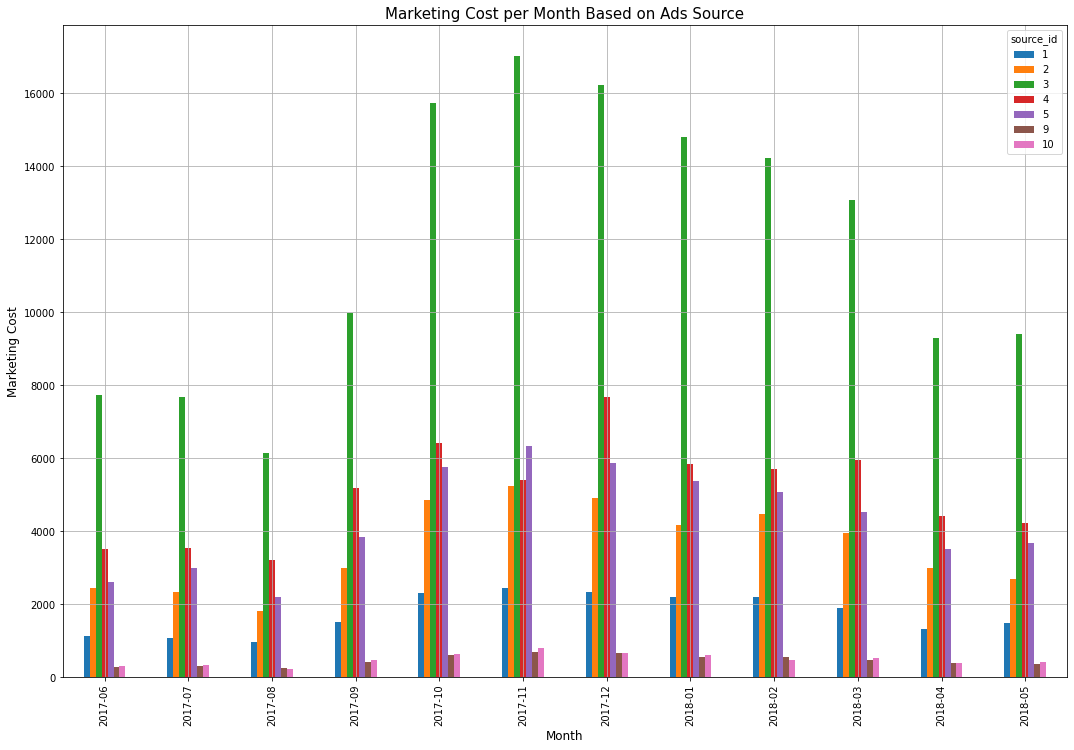

In [ ]:
costs['month'] = costs['dt'].astype('datetime64[M]')
costs['month'] = costs['month'].dt.to_period('M')
cost_by_source_per_m = costs.pivot_table(
    index='month',
    columns='source_id',
    values='costs',
    aggfunc='sum'
)

cost_by_source_per_m.plot(kind='bar', figsize=(18,12), grid=True)

plt.ylabel('Marketing Cost', size=12)
plt.xlabel('Month', size=12)
plt.title('Marketing Cost per Month Based on Ads Source', size=15)

plt.show()

Dari visualisasi data diatas memperlihatkan bahwa secara umum `source_id` nomer `3` merupakan sumber iklan dengan biaya terbesar, jauh diatas sumber biaya lainnya. Disusul oleh sumber iklan `4` dan `5` merupakan 3 besar sumber iklan dengan biaya terbesar.
Dari segi tren. Biaya iklan mengalami peningkatan pada bulan `oktober`, `november`, dan `desember` tahun `2017`.

#### Analisa Biaya Akuisisi Pelanggan Berdasarkan Sumber

Untuk melakukan analisa biaya akuisisi pelanggan berdasarkan sumber diperlukan kolom `source_id` yang berada pada dataframe `visits`. Karena itu saya akan menggabungkan `dataframe` orders dengan `visits` berdasarkan kolom `uid`.

In [ ]:
orders_cac = orders_ltv.merge(visits, on='uid')
orders_cac.shape

(761807, 14)

In [ ]:
orders_cac.duplicated(subset=orders_ltv.columns).sum()

711392

Barisnya melonjak jauh lebih banyak terdapat banyak duplikat. Hal tersebut terjadi karena satu `user id` mengakses situs lebih banyak dibandingkan melakukan transaksi. Sehingga satu `user id` akan mengakses situs lebih dari satu sumber iklan. 

Oleh karena itu untuk menyederhanakan, saya akan menyaring data dengan kondisi waktu pembelian pengguna (`buy_ts`) lebih besar atau sama dengan waktu pengguna memulai sesi kunjungan(`start_ts`) dan lebih kecil atau sama dengan waktu pengguna mengakhiri sesi kunjungan(`end_ts`)  

In [ ]:
orders_cac = orders_cac.loc[(orders_cac['buy_ts'] >= orders_cac['start_ts']) & (orders_cac['buy_ts'] <= orders_cac['end_ts'])].copy()
orders_cac.duplicated(subset=orders_ltv.columns).sum()

0

Penyaringan telah dilakukan dan data yang terduplikat telah tidak ada. Untuk dapat menghitung `CAC` berdasarkan sumber saya memerlukan jumlah user dan biaya dari masing-masing sumber iklan. Karena itu saya akan melakukan hal tersebut selanjutnya. 

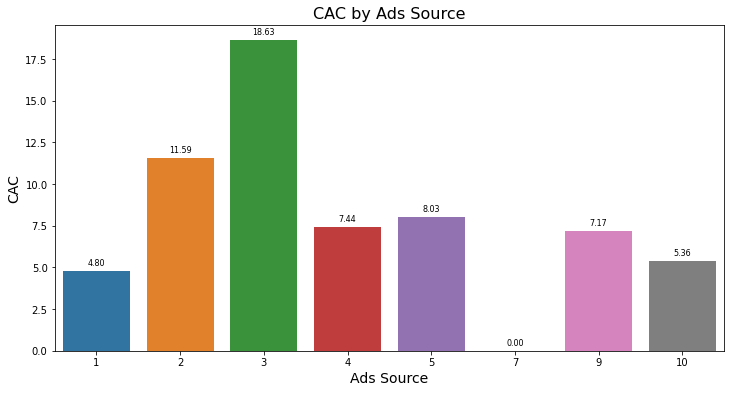

,source_id,n_users,costs,cac
0,1,4336,20833.27,4.804721
1,2,3693,42806.04,11.591129
2,3,7584,141321.63,18.634181
3,4,8205,61073.60,7.443461
4,5,6449,51757.10,8.025601
5,7,1,0.00,0.000000
6,9,770,5517.49,7.165571
7,10,1086,5822.49,5.361409


In [ ]:
n_users_by_source = orders_cac.groupby('source_id').agg({'uid':'nunique'}).reset_index()
n_users_by_source.columns = ['source_id', 'n_users']
costs_by_source = costs.groupby('source_id').agg({'costs':'sum'}).reset_index()
cac_by_source = n_users_by_source.merge(costs_by_source, on='source_id', how='outer')
cac_by_source = cac_by_source.fillna(0)
cac_by_source['cac'] = cac_by_source['costs'] / cac_by_source['n_users']


fig, ax = plt.subplots(figsize=(12, 6))
plots = sns.barplot(data=cac_by_source, x='source_id', y='cac', ax=ax)

for bar in plots.patches:
   
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=8, xytext=(0, 8),
                   textcoords='offset points')

plt.title('CAC by Ads Source', size=16)
plt.xlabel('Ads Source', size=14)
plt.ylabel('CAC', size=14)
plt.show()
cac_by_source

Dari diagram batang diatas memperlilhatkan bahwa `source_id` nomor `3` menjadi `source_id` dengan CAC tertinggi karena dengan biayanya yang tinggi, namun tidak berhasil mendapatkan jumlah `users` yang sama banyaknya. Sebaliknya `source_id` nomor `1` menjadi `source_id` dengan nilai `CAC` terendah yang artinya paling efisien. Karena dengan biaya yang relatif lebih rendah, berhasil mendapatkan `users` cukup banyak. 
Hasil ini dapat membantu tim marketing untuk menentukan sumber-sumber iklan mana saja yang perlu difokuskan.

#### Analisa ROI dari Biaya Pemasaran

Untuk melakukan hal analisa ROI biaya pemasaran berdasarkan `cohort`, jumlah pengguna (`n_users`) dan sumber iklan saya membutuhkan dulu data kolom `cohort` bulan pembelian pertama berdasarkan sumber iklan.

In [ ]:
cohort_sizes_cac = (
    orders_cac.groupby(['first_buy_month', 'source_id'])
    .agg({'uid':'nunique'})
    .reset_index()
) 

cohort_sizes_cac.columns = ['first_buy_month',	'source_id',	'n_users']
cohort_sizes_cac.head()

,first_buy_month,source_id,n_users
0,2017-06-01,1,289
1,2017-06-01,2,279
2,2017-06-01,3,578
3,2017-06-01,4,403
4,2017-06-01,5,408


Kolom `n_users` telah berhasil ditambahkan. selain kolom `n_users` saya juga perlu menambahkan kolom `age` yang menginformasikan usia suatu `cohort`.

In [ ]:
cohorts_cac = (
    orders_cac.groupby(['first_buy_month', 'buy_month', 'source_id'])
    .agg({'revenue':'sum'})
    .reset_index()
)

report_cac = cohorts_cac.merge(cohort_sizes_cac, on=['first_buy_month', 'source_id'])

report_cac['age'] = (
    report_cac['buy_month'] - report_cac['first_buy_month']
) / np.timedelta64(1, 'M')

report_cac['age'] = report_cac['age'].round().astype('int')

report_cac.head()

,first_buy_month,buy_month,source_id,revenue,n_users,age
0,2017-06-01,2017-06-01,1,1264.19,289,0
1,2017-06-01,2017-07-01,1,43.54,289,1
2,2017-06-01,2017-08-01,1,88.09,289,2
3,2017-06-01,2017-09-01,1,99.51,289,3
4,2017-06-01,2017-10-01,1,203.05,289,4


Kolom `age` telah berhasil ditambahkan. Saatnya menambahkan kolom `CAC`, `LTV`, dan `roi` nya.

In [ ]:
costs['month'] = costs['dt'].astype('datetime64[M]')
monthly_cost_by_source = costs.groupby(['month', 'source_id']).agg({'costs':'sum'}).reset_index()
report_cac = report_cac.merge(monthly_cost_by_source, left_on=['first_buy_month', 'source_id'] , right_on=['month', 'source_id'])
report_cac['cac'] = report_cac['costs'] / report_cac['n_users']
report_cac['ltv'] = report_cac['revenue'] / report_cac['n_users'] 
report_cac['roi'] = report_cac['ltv'] / report_cac['cac']

report_cac['first_buy_month'] = report_cac['first_buy_month'].dt.to_period('M') 

report_cac.head()

,first_buy_month,buy_month,source_id,revenue,n_users,age,month,costs,cac,ltv,roi
0,2017-06-01,2017-06-01,1,1264.19,289,0,2017-06-01,1125.61,3.894844,4.374360,1.123115
1,2017-06-01,2017-07-01,1,43.54,289,1,2017-06-01,1125.61,3.894844,0.150657,0.038681
2,2017-06-01,2017-08-01,1,88.09,289,2,2017-06-01,1125.61,3.894844,0.304810,0.078260
3,2017-06-01,2017-09-01,1,99.51,289,3,2017-06-01,1125.61,3.894844,0.344325,0.088405
4,2017-06-01,2017-10-01,1,203.05,289,4,2017-06-01,1125.61,3.894844,0.702595,0.180391


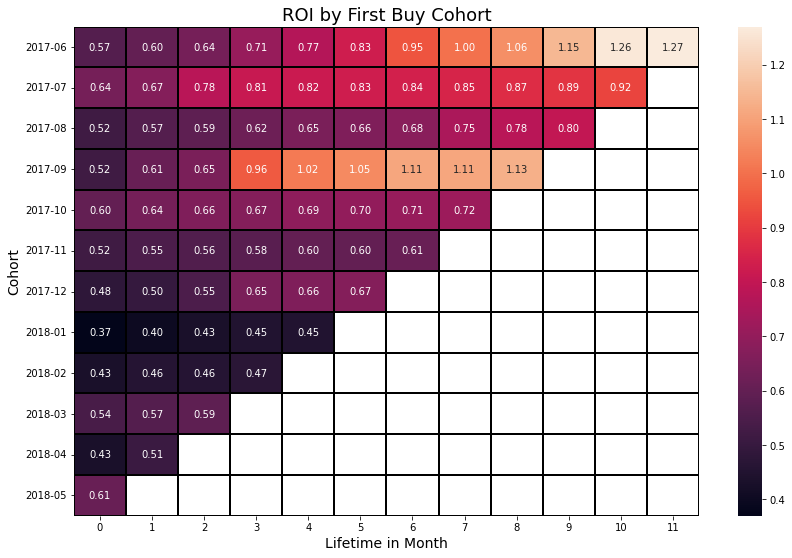

In [ ]:
output_cohort = report_cac.pivot_table(
    index = ['first_buy_month'],
    columns = 'age',
    values = 'roi',
    aggfunc = 'mean'
)

output_cohort = output_cohort.cumsum(axis=1).round(2)

plt.figure(figsize=(14, 9))
plt.title('ROI by First Buy Cohort', size=18)
sns.heatmap(
    output_cohort,
    fmt='.2f',
    annot=True,
    linewidths=1,
    linecolor='black')

plt.ylabel('Cohort', size=14)
plt.xlabel('Lifetime in Month', size=14)
plt.show()

Jika dilihat berdasarkan `cohort`, banyak `cohort` yang belum mencapai titik pengembalian investasi pemasaran hingga bulan keenam. Hanya `cohort` bulan `September` tahun `2017` yang mencapai `ROI` pada bulan keempat, sisanya belum mencapai `ROI`.

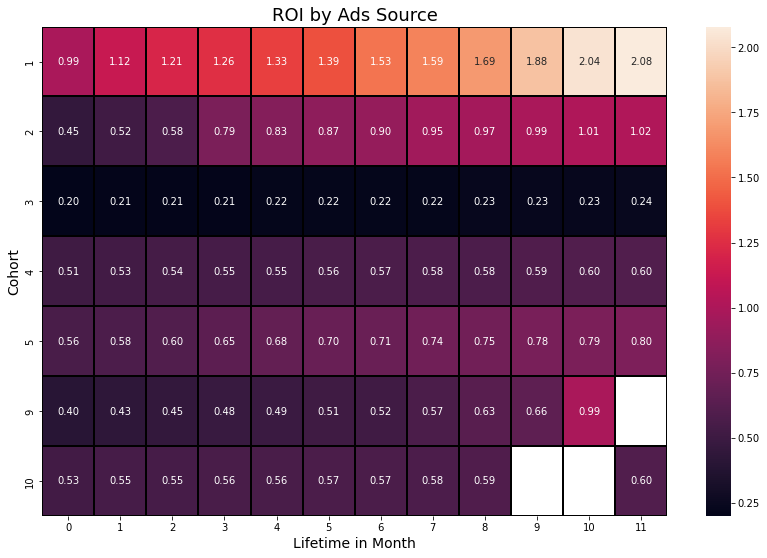

In [ ]:
output_source_id = report_cac.pivot_table(
    index = ['source_id'],
    columns = 'age',
    values = 'roi',
    aggfunc = 'mean'
)

output_source_id = output_source_id.cumsum(axis=1).round(2)

plt.figure(figsize=(14, 9))
plt.title('ROI by Ads Source', size=18)
sns.heatmap(
    output_source_id,
    fmt='.2f',
    annot=True,
    linewidths=1,
    linecolor='black')

plt.ylabel('Cohort', size=14)
plt.xlabel('Lifetime in Month', size=14)
plt.show()

Berdasarkan `source_id`, `source_id` nomor `1` menjadi `source_id` dengan waktu pengembalian tercepat. Pada bulan kedua `source_id` tersebut sudah berhasil menutup biayanya. Sayangnya hal tersebut tidak diikuti dengan `source_id` yang lain. Karena hingga bulan ke-11 hanya `source_id` nomor `2` yang berhasil mencapai titik `ROI`, sedangkan sisanya belum.

#### Kesimpulan Analisa Pemasaran

Dari berbagai analisa pemasaran yang telah dilakukan sebelumnya ada beberapa hal yang dapat menjadi catatan. Dari analisa berbagai sumber hasilnya memperlihatkan terdapat rentang biaya yang cukup jauh dari berbagai sumber iklan.

Hal kedua adalah, suatu sumber iklan yang berhasil mendatangkan banyak transaksi belum tentu memiliki biaya akuisisi yang baik. Karena itu perlunya memantau nilai `CAC`nya.  

Yang terakhir, setelah dilihat `heatmap` `ROI`nya. Sumber iklan nomor `1`, yang merupakan sumber iklan dengan nilai `CAC` terendah menjadi sumber iklan yang berhasil mencapai `ROI` tercepat. 

Selain itu, ada beberapa tambahan analisa yang saya tambahkan untuk tim pemasaran.

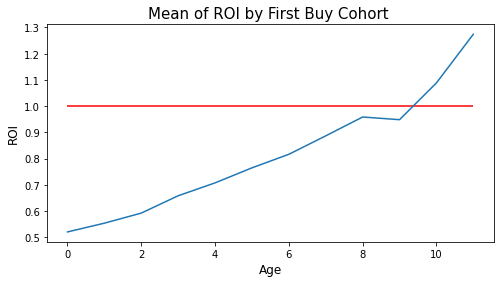

In [ ]:
output_cohort2 = report_cac.pivot_table(
    index = ['first_buy_month'],
    columns = 'age',
    values = 'roi',
    aggfunc = 'mean'
)

output_cohort2_ = output_cohort2.cumsum(axis=1).mean(axis=0)

output_cohort2_.plot(figsize=(8,4))
plt.hlines(y=1, xmin=0, xmax=11, colors='red')

plt.ylabel('ROI', size=12)
plt.xlabel('Age', size=12)
plt.title('Mean of ROI by First Buy Cohort ', size=15)

plt.show()

rata-rata, seluruh `cohort` baru mencapai tingkat `ROI` dibulan ke-10.

In [ ]:
report_cac.head()
result_ltv_ = report_cac.pivot_table(
    index='first_buy_month',
    columns='age',
    values='ltv',
    aggfunc='mean'
)

m10_ltv = result_ltv_.cumsum(axis=1).mean(axis=0)[10]
print('Rata-rata LTV pada bulan ke-10 adalah ' + str(m10_ltv.round(2)))

Rata-rata LTV pada bulan ke-10 adalah 6.71


Berdasarkan dari kedua data diatas, artinya tim pemasaran sebaiknya menganggarkan biaya pemasaran per pelanggan tidak melebihi 6.71. Hal ini perlu dilakukan jika ingin biaya iklan yang telah dibayarkan kembali pada bulan ke-10.

Selain itu artinya tim pemasaran perlu kembali melakukan penyesuaian anggaran terhadap sumber-sumber iklan yang biaya pemasaran per pelanggan diatas nilai tersebut.